In [1]:
import pandas as pd #
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("titanic.csv")
df.head(5) 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
(df.isnull().sum()/len(df))*100


PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [5]:
"""
Cabin          77.104377 -- drop the col
Age            19.865320 -- replace with median/mode -- in case of skewness - median
Embarked        0.224467 -- drop th rows
"""

'\nCabin          77.104377 -- drop the col\nAge            19.865320 -- replace with median/mode -- in case of skewness - median\nEmbarked        0.224467 -- drop th rows\n'

In [6]:
df.drop("Cabin",axis=1,inplace=True)

<Axes: xlabel='Age', ylabel='Density'>

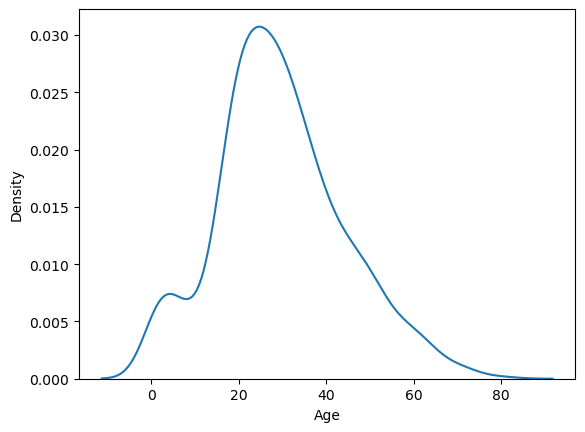

In [7]:
sns.kdeplot(df["Age"])

In [8]:
d=df["Age"].median()
df["Age"].fillna(d,inplace=True)
df["Age"].isnull().sum()

np.int64(0)

In [9]:
df.dropna(inplace=True)

In [10]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [11]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


In [12]:
df.drop(["PassengerId","Name","Ticket"],axis=1,inplace=True)

In [13]:
df.head(1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.25,S


In [14]:
df["Survived"].value_counts() # target imbalanced

Survived
0    549
1    340
Name: count, dtype: int64

<Axes: xlabel='Survived'>

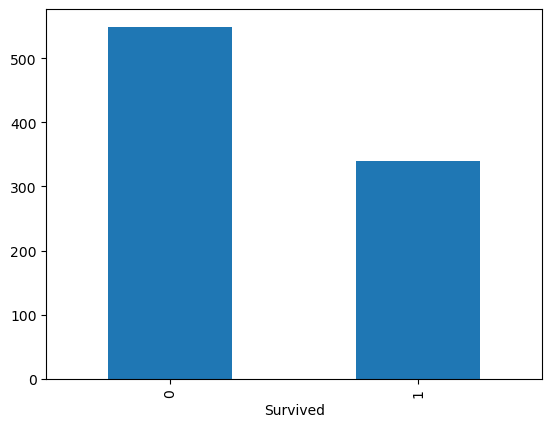

In [15]:
df["Survived"].value_counts().plot(kind="bar")

In [16]:
df["Pclass"].value_counts() # most people are travelling from class 3.

Pclass
3    491
1    214
2    184
Name: count, dtype: int64

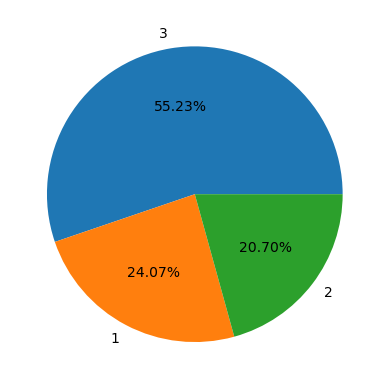

In [17]:
plt.pie(df["Pclass"].value_counts(),autopct="%.2f%%",labels=df["Pclass"].unique())
plt.show() # many people were travelling from Pclass3.

In [18]:
df["Sex"].value_counts() # more males were travelling than females

Sex
male      577
female    312
Name: count, dtype: int64

<Axes: xlabel='Age', ylabel='Density'>

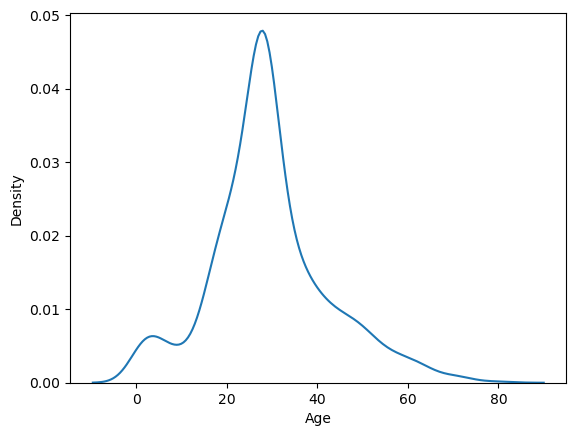

In [19]:
sns.kdeplot(df["Age"]) # right skewness

<Axes: xlabel='Age'>

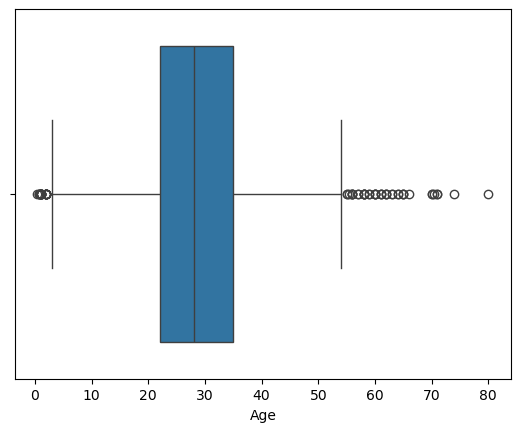

In [20]:
sns.boxplot(data=df,x="Age")

In [21]:
df["Age"].describe()

count    889.000000
mean      29.315152
std       12.984932
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [22]:
df["SibSp"].value_counts() # many people were without siblings or single

SibSp
0    606
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [23]:
df["Parch"].value_counts() # many were travelling single

Parch
0    676
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

In [24]:
# feature engineering
df["Family_size"]=df["SibSp"]+df["Parch"]
df.head(1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family_size
0,0,3,male,22.0,1,0,7.25,S,1


In [25]:
df.drop(["SibSp","Parch"],axis=1,inplace=True)

In [26]:
df.head(2)

,Survived,Pclass,Sex,Age,Fare,Embarked,Family_size
0,0,3,male,22.0,7.2500,S,1
1,1,1,female,38.0,71.2833,C,1


<Axes: xlabel='Fare', ylabel='Density'>

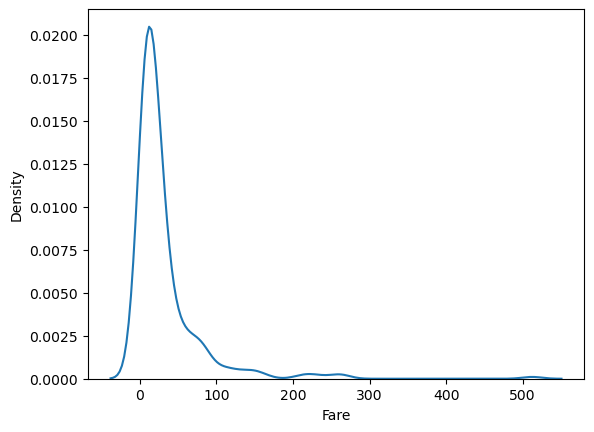

In [27]:
sns.kdeplot(df["Fare"]) #Highly skewed

<Axes: xlabel='Fare'>

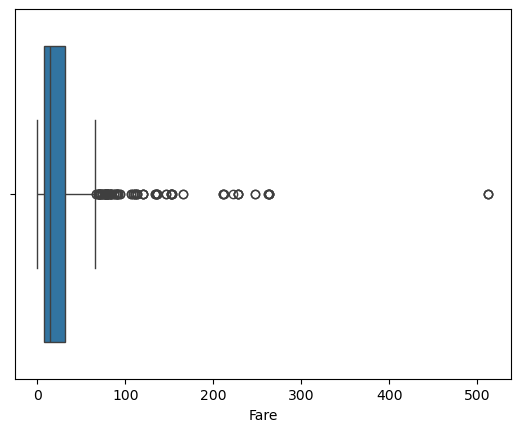

In [28]:
sns.boxplot(data=df,x="Fare") # some people paid a very high price for travelling

In [29]:
df["Embarked"].value_counts() # 

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [30]:
# object datatype encoding
cat_col=df.select_dtypes("object").columns
cat_col

Index(['Sex', 'Embarked'], dtype='object')

In [31]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
df[cat_col]=enc.fit_transform(df[cat_col])
df[cat_col]

,Sex,Embarked
0,1.0,2.0
1,0.0,0.0
2,0.0,2.0
3,0.0,2.0
4,1.0,2.0
...,...,...
886,1.0,2.0
887,0.0,2.0
888,0.0,2.0
889,1.0,0.0


<Axes: xlabel='Survived', ylabel='count'>

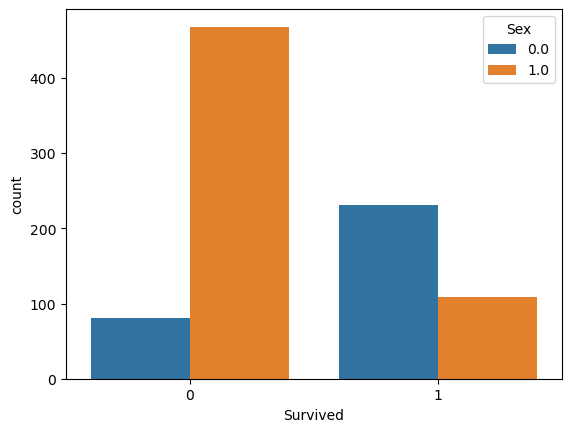

In [32]:
sns.countplot(data=df,x="Survived",hue="Sex") # Gender is a very imp col

<Axes: xlabel='Survived', ylabel='count'>

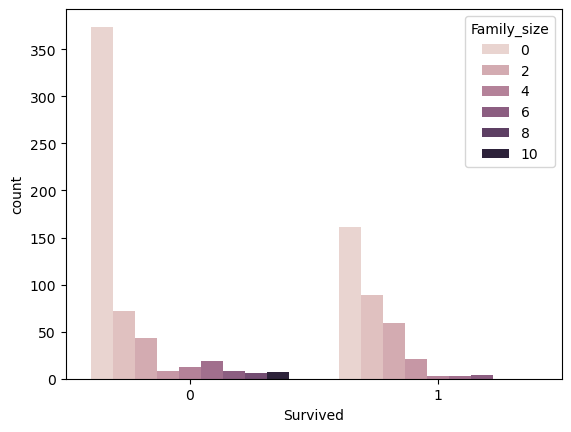

In [33]:
sns.countplot(data=df,x="Survived",hue="Family_size") 
# family size of 0 and 10 are mostly dead. Rest data is overlapped.

<Axes: xlabel='Survived', ylabel='count'>

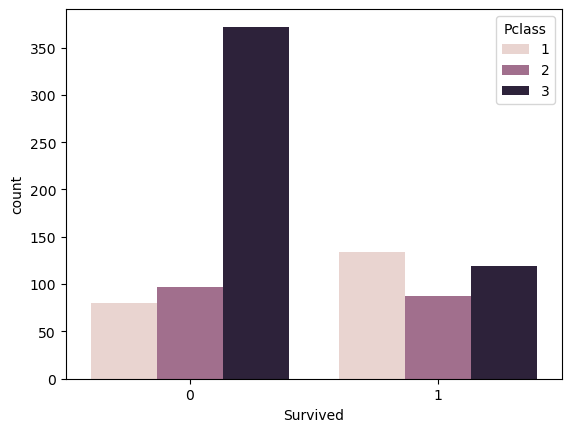

In [34]:
sns.countplot(data=df,x="Survived",hue="Pclass") # pclass 3 travellers mostly died

<Axes: xlabel='Age', ylabel='Density'>

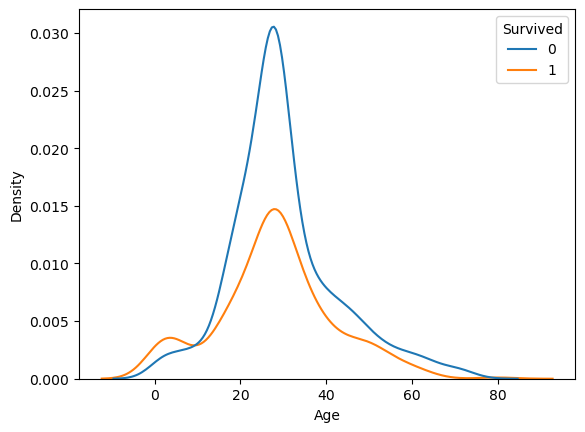

In [35]:
sns.kdeplot(data=df,x="Age",hue="Survived") #overlapped

<Axes: xlabel='Fare', ylabel='Density'>

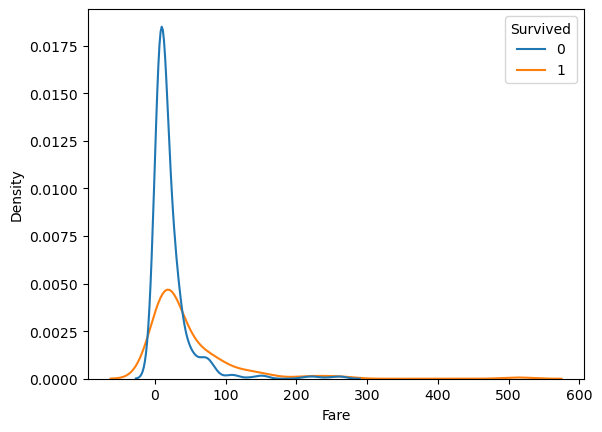

In [36]:
sns.kdeplot(data=df,x="Fare",hue="Survived") # Higher fare people survived most

In [37]:
features=df.drop('Survived',axis=1)
target=df['Survived']

In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features.iloc[:]=scaler.fit_transform(features.iloc[:])
features.head()


,Pclass,Sex,Age,Fare,Embarked,Family_size
0,0.825209,0.735342,-0.563674,-0.500240,0.586840,0.057853
1,-1.572211,-1.359911,0.669217,0.788947,-1.939555,0.057853
2,0.825209,-1.359911,-0.255451,-0.486650,0.586840,-0.561804
3,-1.572211,-1.359911,0.438050,0.422861,0.586840,0.057853
4,0.825209,0.735342,0.438050,-0.484133,0.586840,-0.561804


In [39]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(features,target,test_size=0.2,random_state=1,stratify=target)

In [40]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(xtrain,ytrain) #
ypred=lr.predict(xtest)

In [41]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
c=pd.DataFrame(confusion_matrix(ytest,ypred),index=["Not Survived","Survived"],
                columns=["Not Survived","Survived"])
print("Confusion Matrix : \n",c)
print("Classification Report : \n",classification_report(ytest,ypred))

Confusion Matrix : 
               Not Survived  Survived
Not Survived            92        18
Survived                18        50
Classification Report : 
               precision    recall  f1-score   support

           0       0.84      0.84      0.84       110
           1       0.74      0.74      0.74        68

    accuracy                           0.80       178
   macro avg       0.79      0.79      0.79       178
weighted avg       0.80      0.80      0.80       178



In [42]:
lr.score(xtrain,ytrain)

0.7946554149085795

In [43]:
lr.score(xtest,ytest)

0.797752808988764

In [44]:
print(ytest[:25].values)
print(ypred[:25])

[1 0 0 0 1 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 1 1 0 1]
[1 0 0 1 1 1 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 1 0 0 1]


In [45]:
lr.predict_proba(xtest[:10])

array([[0.20858067, 0.79141933],
       [0.76542812, 0.23457188],
       [0.8778102 , 0.1221898 ],
       [0.27332151, 0.72667849],
       [0.08477233, 0.91522767],
       [0.37050963, 0.62949037],
       [0.51687937, 0.48312063],
       [0.91341947, 0.08658053],
       [0.90222395, 0.09777605],
       [0.88193583, 0.11806417]])

In [46]:
# AUV-ROC Curve

In [47]:
from sklearn.metrics import roc_auc_score,roc_curve

In [48]:
roc_auc_score(ytest,ypred)

np.float64(0.7858288770053476)

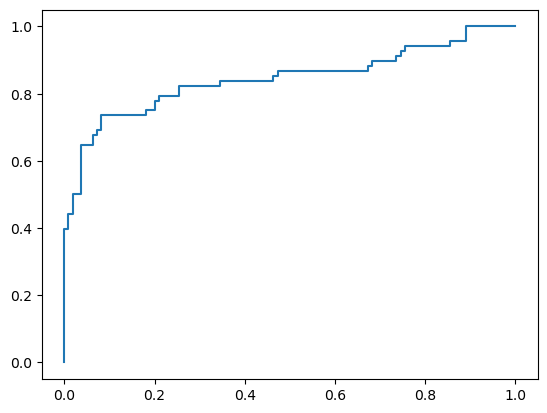

In [49]:
yp=lr.predict_proba(xtest[:])
yp=yp[:,1]
fpr,tpr,threshold=roc_curve(ytest,yp)
plt.plot(fpr,tpr)
plt.show()

In [50]:
from sklearn.preprocessing import binarize
ypred_proba=lr.predict_proba(xtest)[:,1]
ypr=binarize([ypred_proba],threshold=0.4)[0]
ypr=ypr.astype(int)


In [51]:
roc_auc_score(ytest,ypr)

np.float64(0.7823529411764707)

In [52]:
c=pd.DataFrame(confusion_matrix(ytest,ypr),index=["Not Survived","Survived"],
                columns=["Not Survived","Survived"])
print("Confusion Matrix : \n",c)
print("Classification Report : \n",classification_report(ytest,ypr))

Confusion Matrix : 
               Not Survived  Survived
Not Survived            88        22
Survived                16        52
Classification Report : 
               precision    recall  f1-score   support

           0       0.85      0.80      0.82       110
           1       0.70      0.76      0.73        68

    accuracy                           0.79       178
   macro avg       0.77      0.78      0.78       178
weighted avg       0.79      0.79      0.79       178

